# Exploratory Data Analysis and Feature Scaling

In this notebook, we explore the dataset to understand its structure, distrubutions, and relationships between variables. We also apply preprocessing and scaling techniques to prepare the data for machine learning models.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [68]:
df = pd.read_csv("../data/raw/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [69]:
print(df.shape)

(1143, 13)


The Wine Quality dataset contains 1143 observations and 13 features. One of these
features corresponds to an identifier, so after removing it, the dataset contains
12 relevant features.

The features describe the chemical composition of wine samples, such as density,
pH, and other physicochemical properties. One important feature is `quality`,
which is measured on a standard scale from 1 to 10.

In [70]:
#Drop the Id column 
df = df.drop("Id", axis = 1)
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
12,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
311,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
350,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6
801,8.5,0.280,0.35,1.7,0.061,6.0,15.0,0.99524,3.30,0.74,11.8,7
21,7.8,0.645,0.00,2.0,0.082,8.0,16.0,0.99640,3.38,0.59,9.8,6


In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


In [72]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

After dropping the ID column, we analyze the dataset structure and summary statistics.
All features are numerical, and there are no missing values in the dataset.

Some interesting observations can be made from the descriptive statistics. For example,
although the quality variable is defined on a 1–10 scale, the maximum observed value
in the dataset is 8. Additionally, the minimum pH value is 2.74. Since lower pH values
indicate higher acidity, this corresponds to the most acidic wine sample in the dataset.

In [73]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Although 'df.info()' shows that all columns have the same number of non-null entries, an explicit missing value check was performed to confirm that no null entries are present.

In [74]:
df.duplicated().sum()

np.int64(125)

A duplicate row check shows 125 duplicated observations. These rows correspond to wine samples that share identical physochemical measurements and quality scores. Given the nature of the dataset, such duplicates likely represent valid and independent samples rather than collection errors. Therefore, these observations were retained.

## Target variable: Wine Quality


quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64


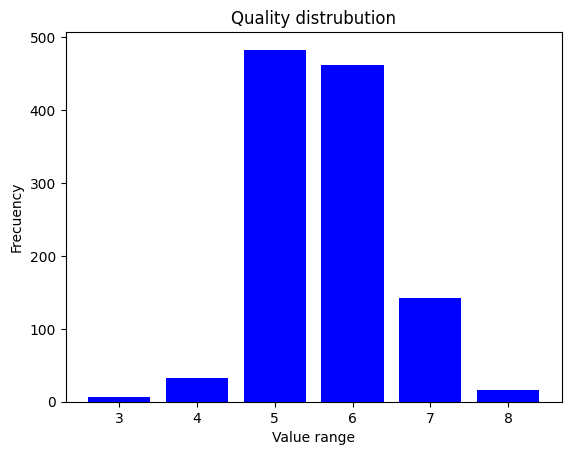

In [92]:
grades = df['quality'].unique()
quality = df['quality'].value_counts()
plt.title("Quality distrubution")
plt.xlabel("Value range")
plt.ylabel("Frecuency")
plt.bar(grades, quality, color = 'b')
print(quality)